/var/folders/gt/h6tb7mls5q53n9wrgz39ksk80000gn/T/ipykernel_9052/3565855933.py:108: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


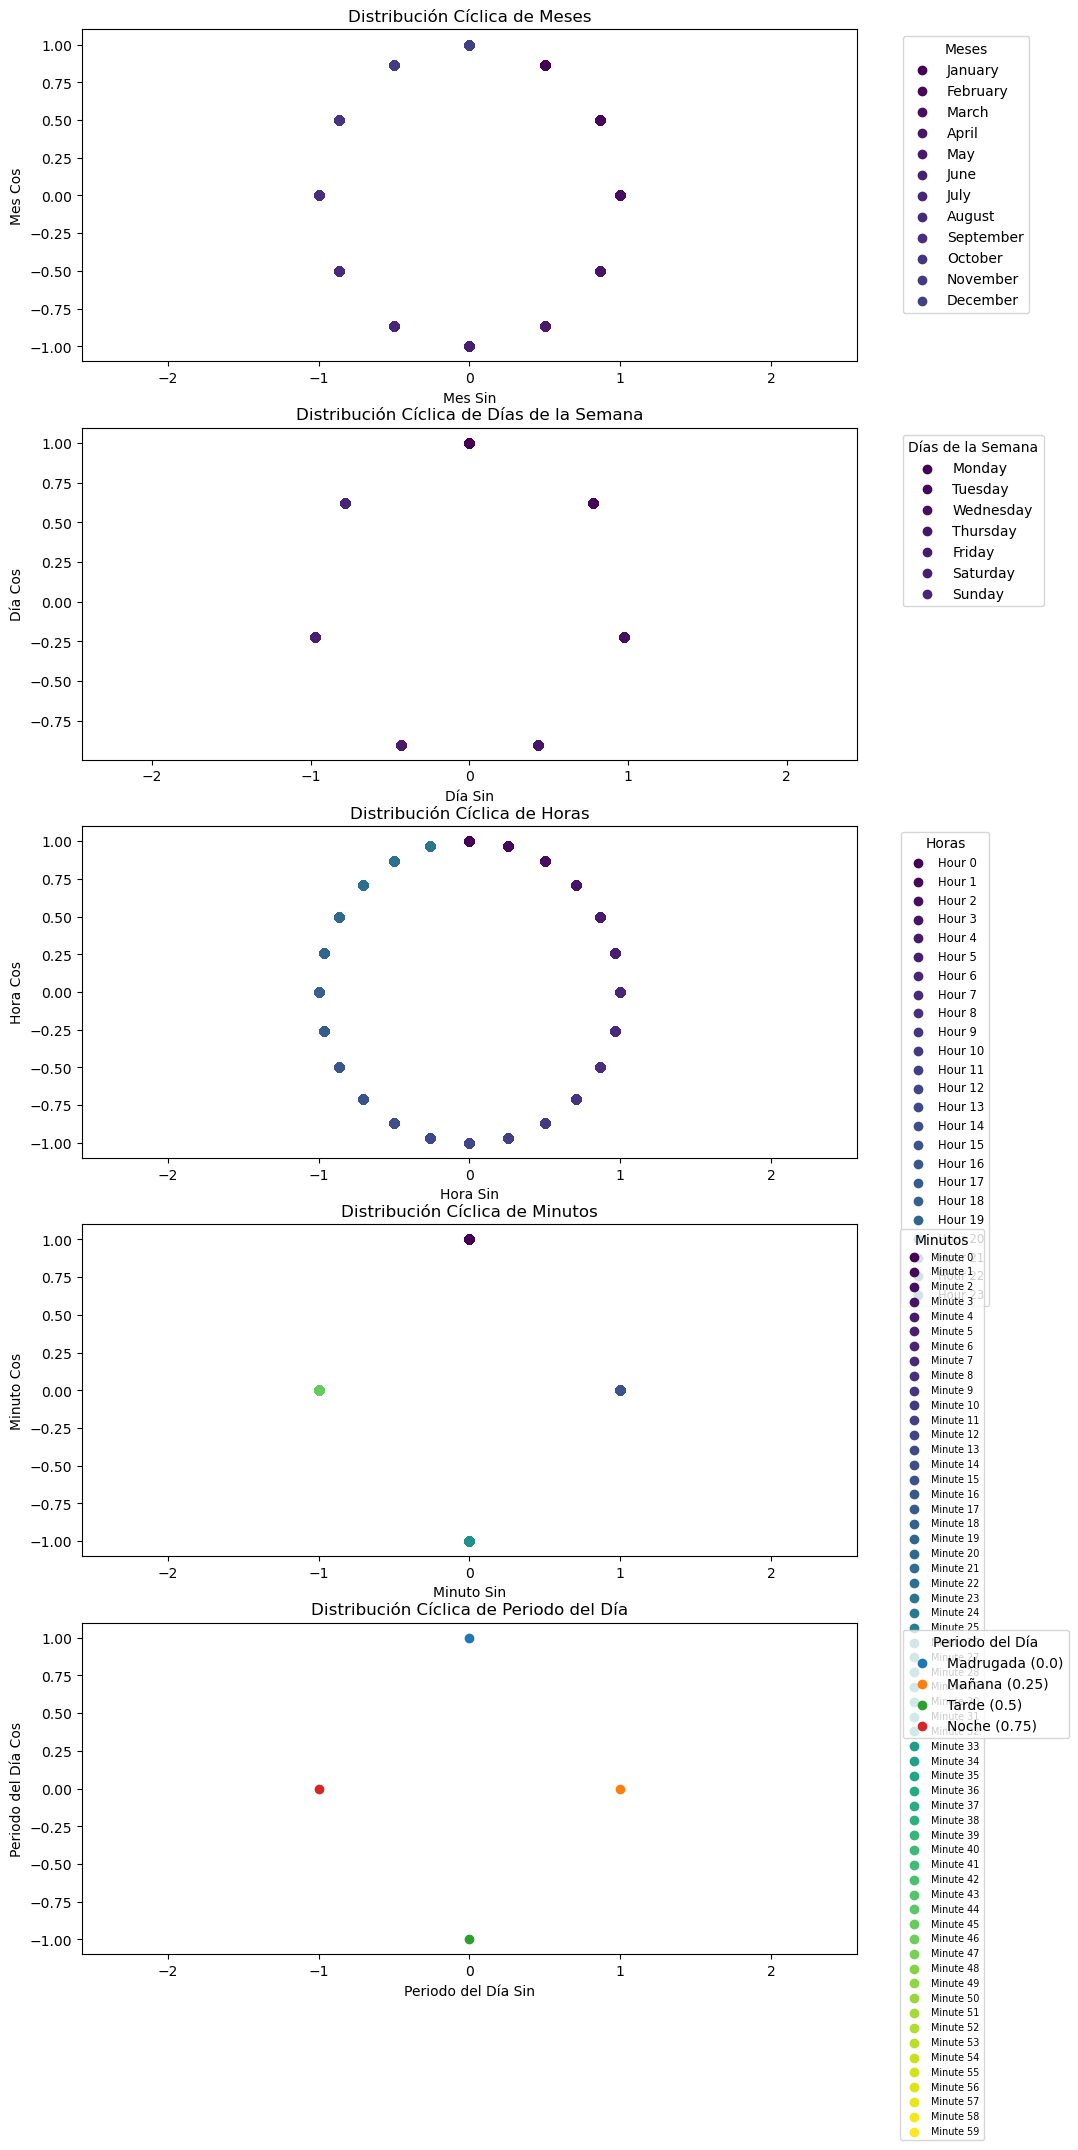

Dataset preparado y guardado con éxito.


In [5]:
import pandas as pd
from math import sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset.csv')


df['fecha'] = pd.to_datetime(df['fecha'])
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S')

df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.dayofweek
df['hora_decimal'] = df['hora'].dt.hour
df['minuto_decimal'] = df['hora'].dt.minute

# Diccionarios 
meses_nombres = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
dias_nombres = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday",
    3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"
}


periodo_dia_valores = {
    'Madrugada': 0.0,  
    'Mañana': 0.25,    
    'Tarde': 0.5,      
    'Noche': 0.75      
}
df['periodo_dia'] = df['periodo_dia'].map(periodo_dia_valores)


# Función para pasar a coordenadas cíclicas
def convertir_ciclico(valor, max_val):
    sin_val = sin(2 * pi * valor / max_val)
    cos_val = cos(2 * pi * valor / max_val)
    return (sin_val, cos_val)

df['periodo_dia_sin'], df['periodo_dia_cos'] = zip(*df['periodo_dia'].apply(lambda x: convertir_ciclico(x, 1)))
df['mes_sin'], df['mes_cos'] = zip(*df['mes'].apply(lambda x: convertir_ciclico(x, 12)))
df['dia_sin'], df['dia_cos'] = zip(*df['dia'].apply(lambda x: convertir_ciclico(x, 7)))
df['hora_sin'], df['hora_cos'] = zip(*df['hora_decimal'].apply(lambda x: convertir_ciclico(x, 24)))
df['minuto_sin'], df['minuto_cos'] = zip(*df['minuto_decimal'].apply(lambda x: convertir_ciclico(x, 60)))


fig, axs = plt.subplots(5, 1, figsize=(10, 25))  


colors = plt.cm.viridis(np.linspace(0, 1, max(len(meses_nombres), len(dias_nombres), 24, 60)))


for mes in sorted(meses_nombres.keys()):
    mes_data = df[df['mes'] == mes]
    axs[0].scatter(mes_data['mes_sin'], mes_data['mes_cos'], color=colors[mes-1], label=meses_nombres[mes])
axs[0].legend(title="Meses", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].set_title('Distribución Cíclica de Meses')
axs[0].set_xlabel('Mes Sin')
axs[0].set_ylabel('Mes Cos')
axs[0].axis('equal')


for dia in sorted(dias_nombres.keys()):
    dia_data = df[df['dia'] == dia]
    axs[1].scatter(dia_data['dia_sin'], dia_data['dia_cos'], color=colors[dia], label=dias_nombres[dia])
axs[1].legend(title="Días de la Semana", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_title('Distribución Cíclica de Días de la Semana')
axs[1].set_xlabel('Día Sin')
axs[1].set_ylabel('Día Cos')
axs[1].axis('equal')


for hora in range(24):
    hora_data = df[df['hora_decimal'] == hora]
    axs[2].scatter(hora_data['hora_sin'], hora_data['hora_cos'], color=colors[hora], label=f'Hour {hora}')
axs[2].legend(title="Horas", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
axs[2].set_title('Distribución Cíclica de Horas')
axs[2].set_xlabel('Hora Sin')
axs[2].set_ylabel('Hora Cos')
axs[2].axis('equal')


for minuto in range(60):
    minuto_data = df[df['minuto_decimal'] == minuto]
    axs[3].scatter(minuto_data['minuto_sin'], minuto_data['minuto_cos'], color=colors[minuto], label=f'Minute {minuto}')
axs[3].legend(title="Minutos", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')
axs[3].set_title('Distribución Cíclica de Minutos')
axs[3].set_xlabel('Minuto Sin')
axs[3].set_ylabel('Minuto Cos')
axs[3].axis('equal')


for key, value in periodo_dia_valores.items():
    sin_cos = convertir_ciclico(value, 1)
    axs[4].scatter(sin_cos[0], sin_cos[1], label=f'{key} ({value})')
axs[4].legend(title="Periodo del Día", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[4].set_title('Distribución Cíclica de Periodo del Día')
axs[4].set_xlabel('Periodo del Día Sin')
axs[4].set_ylabel('Periodo del Día Cos')
axs[4].axis('equal')

plt.tight_layout()
plt.show()

# Escalado
df['intensidad'] = df['intensidad'] / 1000  
df['carga'] = df['carga'] / 100  

df['es_fin_de_semana'] = df['es_fin_de_semana'].astype(int)
df['hubo_partido'] = df['hubo_partido'].astype(int)
df['es_festivo'] = df['es_festivo'].astype(int)



df.drop(['fecha', 'mes', 'dia', 'hora', 'hora_decimal', 'minuto_decimal', 'periodo_dia'], axis=1, inplace=True)
df.to_csv('dataset_final.csv', index=False)
print("Dataset preparado y guardado con éxito.")


In [6]:

print("Coordenadas cíclicas de los meses:")
for mes in sorted(meses_nombres.keys()):
    sin_cos = convertir_ciclico(mes, 12)
    print(f"{meses_nombres[mes]}: Sin({sin_cos[0]}), Cos({sin_cos[1]})")


print("\nCoordenadas cíclicas de los días de la semana:")
for dia in sorted(dias_nombres.keys()):
    sin_cos = convertir_ciclico(dia, 7)
    print(f"{dias_nombres[dia]}: Sin({sin_cos[0]}), Cos({sin_cos[1]})")


print("\nCoordenadas cíclicas de las horas:")
for hora in range(24):
    sin_cos = convertir_ciclico(hora, 24)
    print(f"Hora {hora}: Sin({sin_cos[0]}), Cos({sin_cos[1]})")

Coordenadas cíclicas de los meses:
January: Sin(0.49999999999999994), Cos(0.8660254037844387)
February: Sin(0.8660254037844386), Cos(0.5000000000000001)
March: Sin(1.0), Cos(6.123233995736766e-17)
April: Sin(0.8660254037844387), Cos(-0.49999999999999983)
May: Sin(0.49999999999999994), Cos(-0.8660254037844387)
June: Sin(1.2246467991473532e-16), Cos(-1.0)
July: Sin(-0.4999999999999998), Cos(-0.8660254037844388)
August: Sin(-0.8660254037844384), Cos(-0.5000000000000004)
September: Sin(-1.0), Cos(-1.8369701987210297e-16)
October: Sin(-0.8660254037844386), Cos(0.5000000000000001)
November: Sin(-0.5000000000000004), Cos(0.8660254037844384)
December: Sin(-2.4492935982947064e-16), Cos(1.0)

Coordenadas cíclicas de los días de la semana:
Monday: Sin(0.0), Cos(1.0)
Tuesday: Sin(0.7818314824680298), Cos(0.6234898018587336)
Wednesday: Sin(0.9749279121818236), Cos(-0.22252093395631434)
Thursday: Sin(0.43388373911755823), Cos(-0.900968867902419)
Friday: Sin(-0.433883739117558), Cos(-0.90096886790241

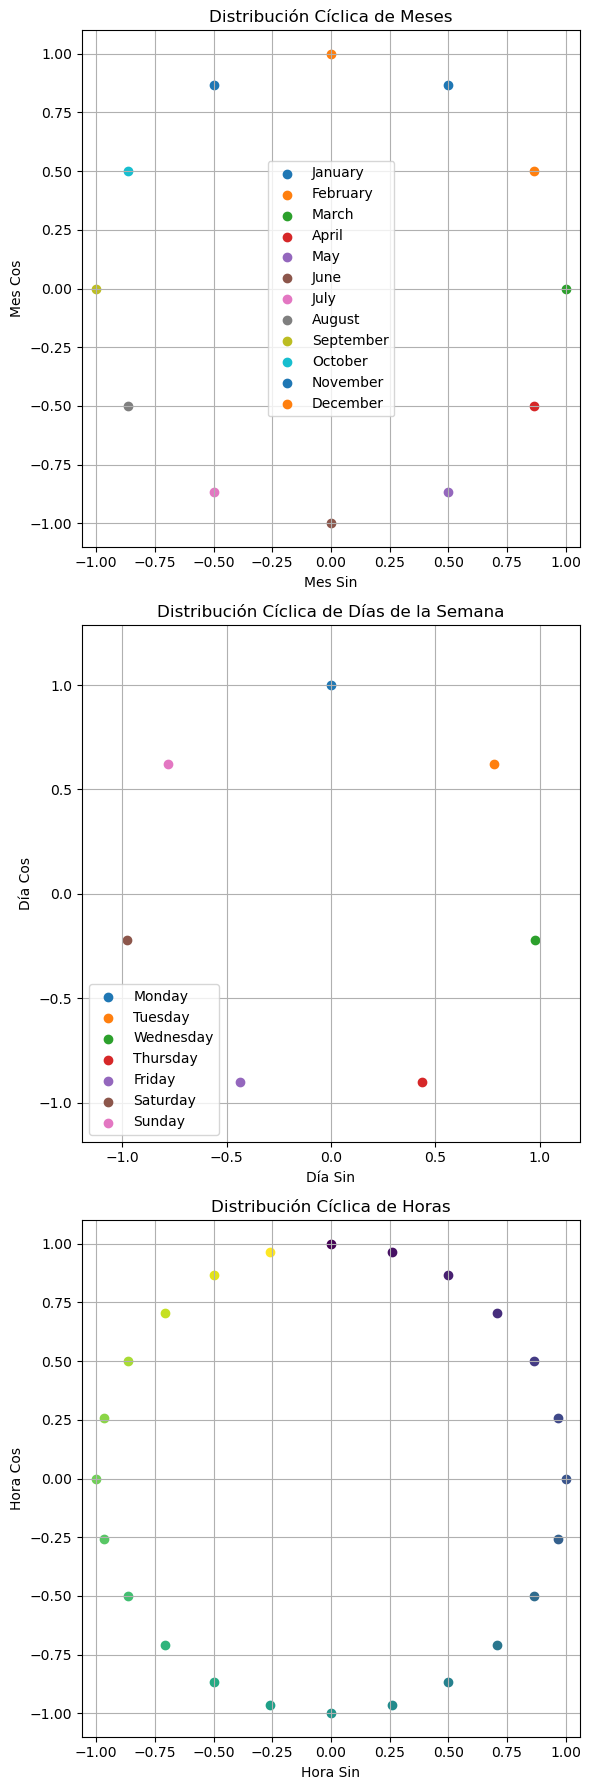

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('dataset_final.csv')


meses_nombres = {
    'January': (0.5, 0.866),
    'February': (0.866, 0.5),
    'March': (1.0, 6.12e-17),
    'April': (0.866, -0.5),
    'May': (0.5, -0.866),
    'June': (1.22e-16, -1.0),
    'July': (-0.5, -0.866),
    'August': (-0.866, -0.5),
    'September': (-1.0, -1.84e-16),
    'October': (-0.866, 0.5),
    'November': (-0.5, 0.866),
    'December': (-2.45e-16, 1.0)
}

dias_nombres = {
    'Monday': (0.0, 1.0),
    'Tuesday': (0.782, 0.623),
    'Wednesday': (0.975, -0.223),
    'Thursday': (0.434, -0.901),
    'Friday': (-0.434, -0.901),
    'Saturday': (-0.975, -0.223),
    'Sunday': (-0.782, 0.623)
}


plt.figure(figsize=(6, 18))


plt.subplot(3, 1, 1)
for mes, coords in meses_nombres.items():
    plt.scatter(coords[0], coords[1], label=mes)
plt.title('Distribución Cíclica de Meses')
plt.xlabel('Mes Sin')
plt.ylabel('Mes Cos')
plt.legend()
plt.grid(True)
plt.axis('equal')


plt.subplot(3, 1, 2)
for dia, coords in dias_nombres.items():
    plt.scatter(coords[0], coords[1], label=dia)
plt.title('Distribución Cíclica de Días de la Semana')
plt.xlabel('Día Sin')
plt.ylabel('Día Cos')
plt.legend()
plt.grid(True)
plt.axis('equal')


plt.subplot(3, 1, 3)
colors = plt.cm.viridis(np.linspace(0, 1, 24))
for hora in range(24):
    sin_val = np.sin(2 * np.pi * hora / 24)
    cos_val = np.cos(2 * np.pi * hora / 24)
    plt.scatter(sin_val, cos_val, color=colors[hora], label=f'Hour {hora}')
plt.title('Distribución Cíclica de Horas')
plt.xlabel('Hora Sin')
plt.ylabel('Hora Cos')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np


df = pd.read_csv('dataset_final.csv')


meses_coordenadas = {
    1: (0.5, 0.866),
    2: (0.866, 0.5),
    3: (1.0, 6.12e-17),
    4: (0.866, -0.5),
    5: (0.5, -0.866),
    6: (1.22e-16, -1.0),
    7: (-0.5, -0.866),
    8: (-0.866, -0.5),
    9: (-1.0, -1.84e-16),
    10: (-0.866, 0.5),
    11: (-0.5, 0.866),
    12: (-2.45e-16, 1.0)
}

dias_coordenadas = {
    0: (0.0, 1.0),
    1: (0.782, 0.623),
    2: (0.975, -0.223),
    3: (0.434, -0.901),
    4: (-0.434, -0.901),
    5: (-0.975, -0.223),
    6: (-0.782, 0.623)
}


def verificar_coordenadas(df, coordenadas, col_sin, col_cos, entity):
    presentes = []
    for key, (sin_val, cos_val) in coordenadas.items():
        
        mask = (np.isclose(df[col_sin], sin_val, atol=1e-2) & np.isclose(df[col_cos], cos_val, atol=1e-2))
        if not df[mask].empty:
            presentes.append(key)
        else:
            print(f"{entity} {key} con Sin: {sin_val} y Cos: {cos_val} no encontrado o incorrecto.")
    return presentes


meses_presentes = verificar_coordenadas(df, meses_coordenadas, 'mes_sin', 'mes_cos', 'Mes')
dias_presentes = verificar_coordenadas(df, dias_coordenadas, 'dia_sin', 'dia_cos', 'Día')

print(f"Meses presentes correctamente: {meses_presentes}")
print(f"Días presentes correctamente: {dias_presentes}")


Meses presentes correctamente: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Días presentes correctamente: [0, 1, 2, 3, 4, 5, 6]
